In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data
data = np.genfromtxt('/content/drive/MyDrive/Py/diabetes.data.txt')
print(data)

[[     nan      nan      nan ...      nan      nan      nan]
 [ 59.       2.      32.1    ...   4.8598  87.     151.    ]
 [ 48.       1.      21.6    ...   3.8918  69.      75.    ]
 ...
 [ 60.       2.      24.9    ...   4.1271  95.     132.    ]
 [ 36.       1.      30.     ...   5.1299  85.     220.    ]
 [ 36.       1.      19.6    ...   4.5951  92.      57.    ]]


In [ ]:
#Changing dataset from "numpy.ndarray" to begin scrubbing the data
df = pd.DataFrame(data, columns= ['Age','Sex','Bmi','Bp','S1','S2','S3','S4','S5',
                                  'S6','Regression'])
print(df)
print('The new data tpye is : ', type(df))

      Age  Sex   Bmi      Bp     S1     S2    S3    S4      S5     S6  \
0     NaN  NaN   NaN     NaN    NaN    NaN   NaN   NaN     NaN    NaN   
1    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   
2    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   
3    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   
4    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...   
438  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   
439  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   
440  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   
441  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   
442  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   

     Regression  
0           NaN  
1         151.0  
2          75.0  
3         141.0  
4         206.0  
..          ...

In [ ]:
#Changing datatype genereated NaN values and add an additional row
#droping NaN and additional row
df = df.drop(0)

In [ ]:
def nulls_by_row(df):
# Calculate the number of percent of null values in each row.
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [ ]:
def nulls_by_col(df):
# Calculate the number and percent of null values in each column.
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing/rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

In [ ]:
def df_summary(df):
# Print information about the data including its shape, datatypes, number of values, 
# number of null values in each row and column, the number of unique rows, etc.
    print('--- Shape: {}'.format(df.shape))
    print('\n--- Info')
    display(df.info())
    print('\n--- Descriptions')
    display(df.describe(include='all'))
    print('\n--- Nulls By Column')
    display(nulls_by_col(df))
    print('\n--- Nulls By Row')
    display(nulls_by_row(df))
    print('\n---Unique Rows')
    display(df.apply(lambda x: x.nunique()))

In [ ]:
df_summary(df)

--- Shape: (442, 11)

--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 1 to 442
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         442 non-null    float64
 1   Sex         442 non-null    float64
 2   Bmi         442 non-null    float64
 3   Bp          442 non-null    float64
 4   S1          442 non-null    float64
 5   S2          442 non-null    float64
 6   S3          442 non-null    float64
 7   S4          442 non-null    float64
 8   S5          442 non-null    float64
 9   S6          442 non-null    float64
 10  Regression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None


--- Descriptions


Age         Sex         Bmi          Bp          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6  Regression  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000


--- Nulls By Column


num_rows_missing  pct_rows_missing
Age                        0               0.0
Sex                        0               0.0
Bmi                        0               0.0
Bp                         0               0.0
S1                         0               0.0
S2                         0               0.0
S3                         0               0.0
S4                         0               0.0
S5                         0               0.0
S6                         0               0.0
Regression                 0               0.0


--- Nulls By Row


num_cols_missing pct_cols_missing  num_rows
0                0              0.0       442


---Unique Rows


Age            58
Sex             2
Bmi           163
Bp            100
S1            141
S2            302
S3             63
S4             66
S5            184
S6             56
Regression    214
dtype: int64

In [ ]:
print('Total duplicates found: ', df.duplicated().sum())

Total duplicates found:  0


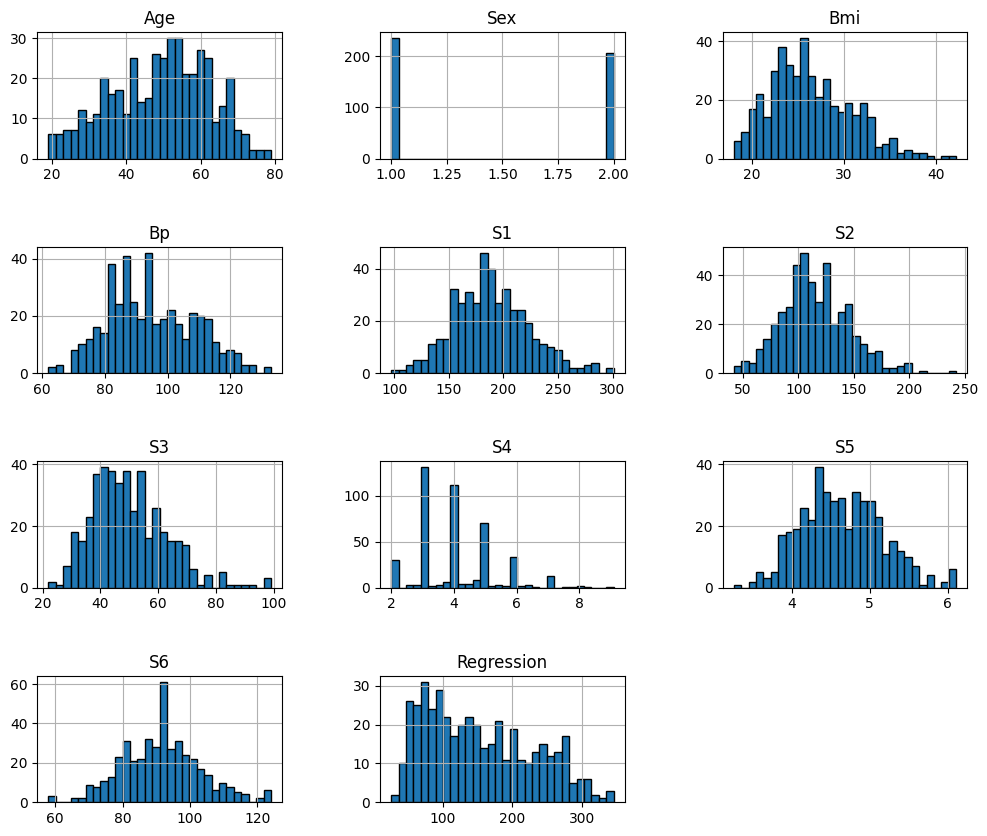

In [ ]:
df.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

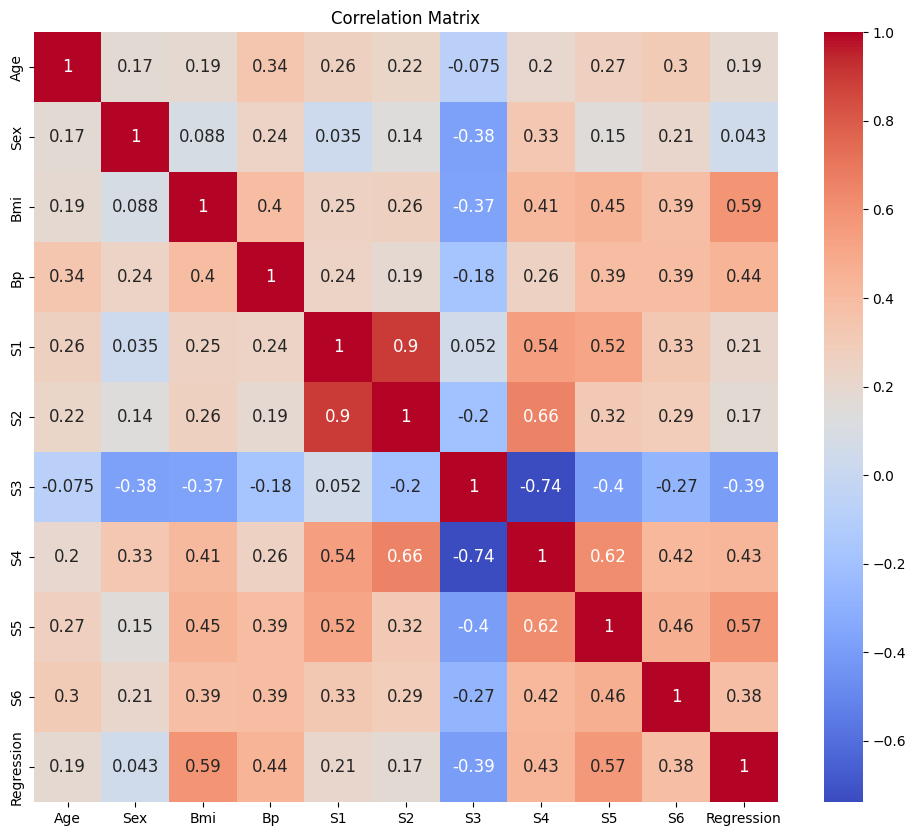

In [ ]:
# create a larger figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax, annot_kws={"fontsize":12})
ax.set_title("Correlation Matrix")
plt.show()

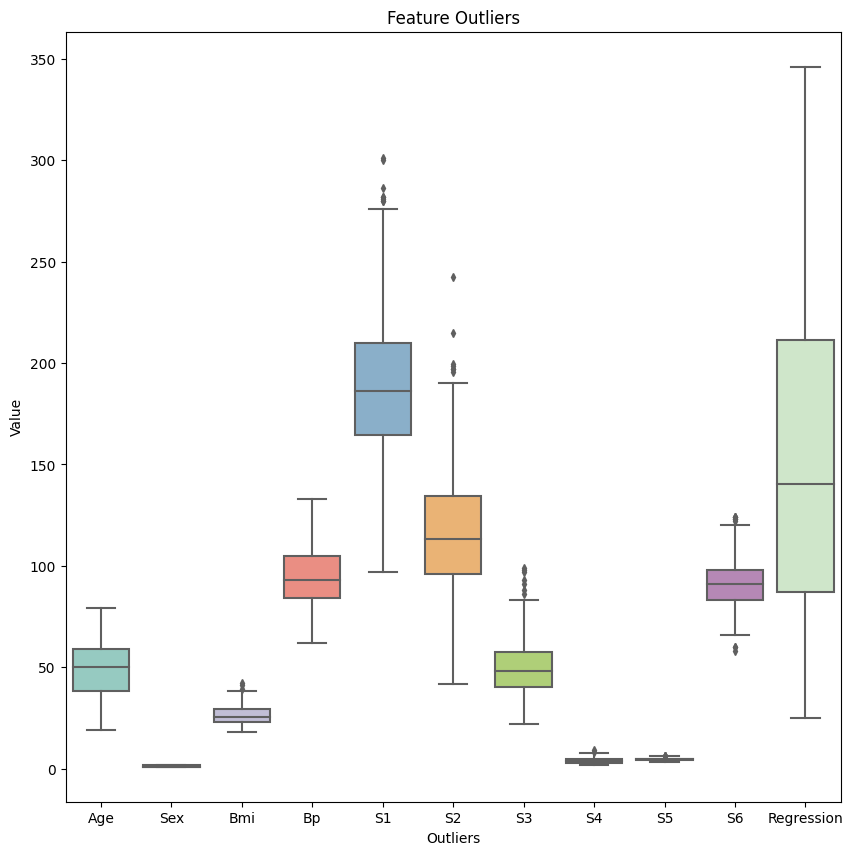

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[['Age','Sex','Bmi','Bp','S1','S2','S3','S4','S5','S6','Regression']], 
            palette='Set3', fliersize=4)

plt.title('Feature Outliers')
plt.xlabel('Outliers')
plt.ylabel('Value')

plt.show()

Text(0, 0.5, 'S5')

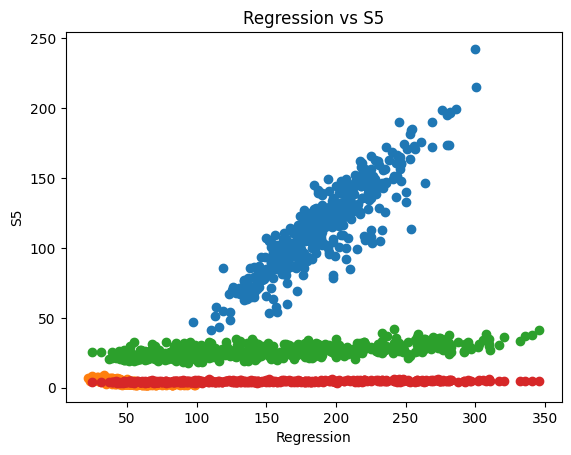

In [ ]:
#shows that the variables s1 and s2 are highly correlated, 0.9
plt.scatter(df['S1'], df['S2'])
plt.title('S1 vs S2')
plt.xlabel('S1')
plt.ylabel('S2')
 
#shows that the variables s3 and s4 are correlated, 0.74
plt.scatter(df['S3'], df['S4'])
plt.title('S3 vs S4')
plt.xlabel('S3')
plt.ylabel('S4')
 
#shows a correlation between regression and bmi, 0.59
plt.scatter(df['Regression'], df['Bmi'])
plt.title('Regression vs Bmi')
plt.xlabel('Regression')
plt.ylabel('Bmi')
 
#shows a correlation between regression and bmi, 0.57
plt.scatter(df['Regression'], df['S5'])
plt.title('Regression vs S5')
plt.xlabel('Regression')
plt.ylabel('S5')

In [ ]:
print(list(df))

['Age', 'Sex', 'Bmi', 'Bp', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Regression']


In [ ]:
df["Sex"].unique()

array([2., 1.])

In [ ]:
df["Sex"] = df["Sex"].astype(np.int8)
df.dtypes

Age           float64
Sex              int8
Bmi           float64
Bp            float64
S1            float64
S2            float64
S3            float64
S4            float64
S5            float64
S6            float64
Regression    float64
dtype: object

In [ ]:
numeric_features = list(df.select_dtypes("float64").columns)
numeric_features.remove('Regression')
categorical_features = list(df.select_dtypes("int8").columns)
target = "target"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['Age', 'Bmi', 'Bp', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

categorical_features:
['Sex']

target:
target


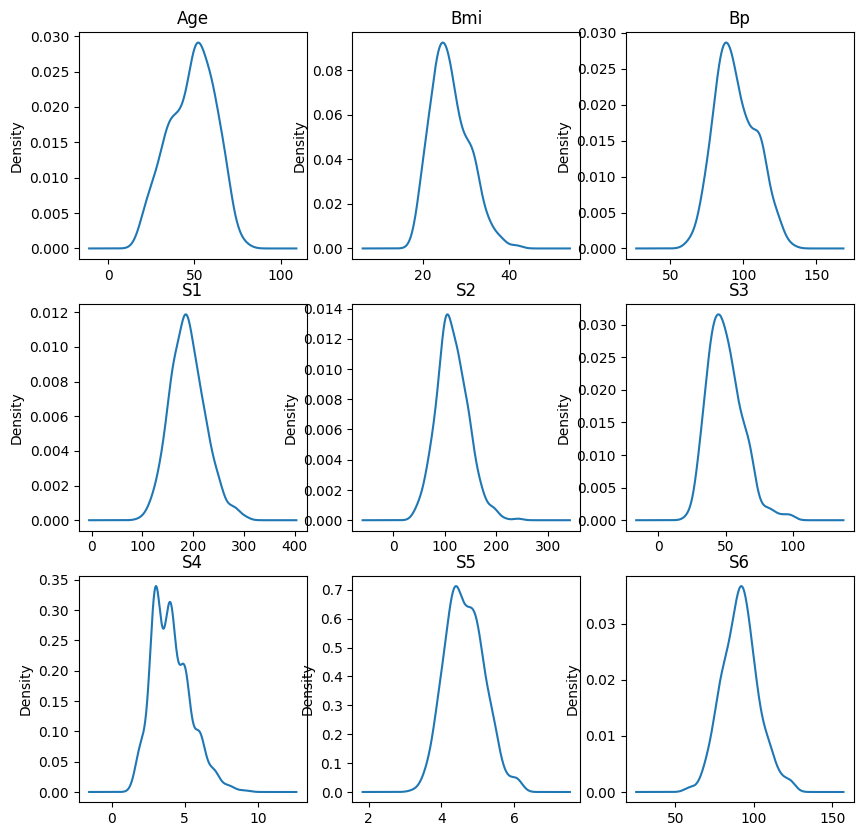

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

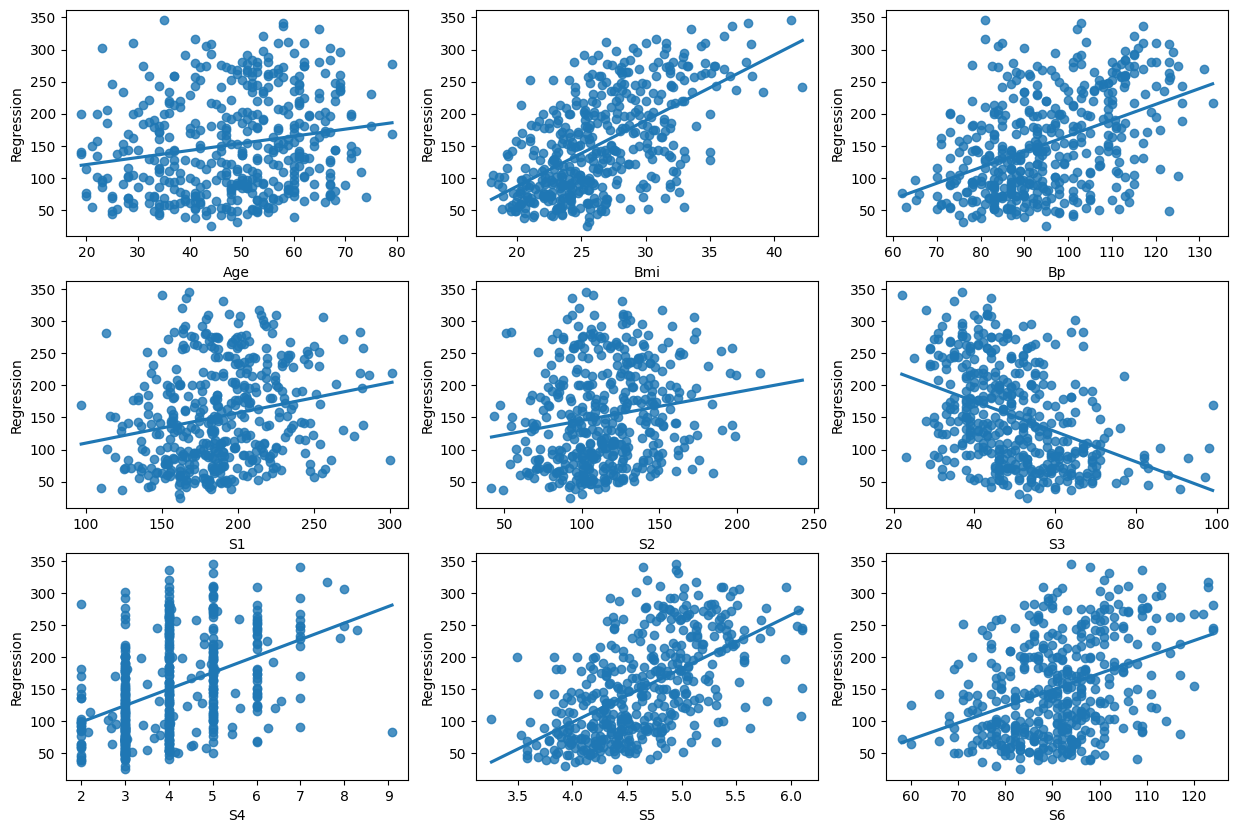

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="Regression",data=df,ax=ax[row,col],ci=False)
    col += 1

In [ ]:
df.head()

Age  Sex   Bmi     Bp     S1     S2    S3   S4      S5    S6  Regression
1  59.0    2  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0       151.0
2  48.0    1  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0        75.0
3  72.0    2  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0       141.0
4  24.0    1  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0       206.0
5  50.0    1  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0       135.0

#1 Predicting 'y' using only one feature of 'x'

      Age  Sex   Bmi      Bp     S1     S2    S3    S4      S5     S6  \
1    59.0    2  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   
2    48.0    1  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   
3    72.0    2  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   
4    24.0    1  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   
5    50.0    1  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0   
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...   
438  60.0    2  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   
439  47.0    2  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   
440  60.0    2  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   
441  36.0    1  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   
442  36.0    1  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   

     Regression  
1         151.0  
2          75.0  
3         141.0  
4         206.0  
5         135.0  
..          ...

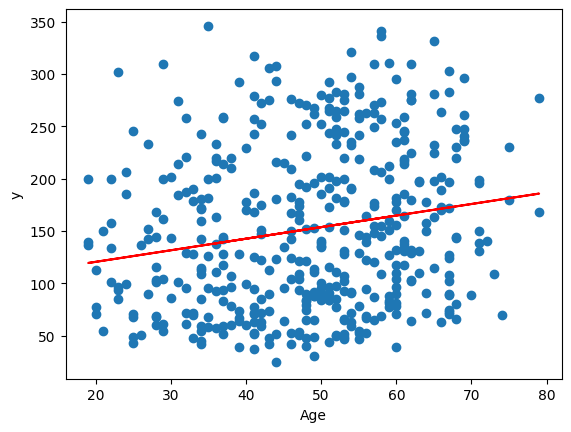

Feature: Sex
Slope: 6.645
Y-Intercept: 142.376
MSE: 5918.889
r2 score: 0.002


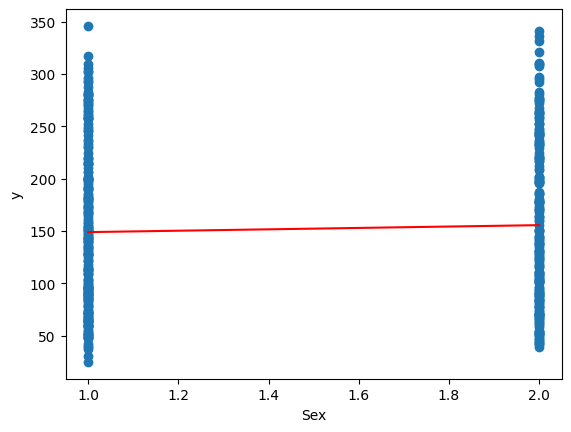

Feature: Bmi
Slope: 10.233
Y-Intercept: -117.773
MSE: 3890.457
r2 score: 0.344


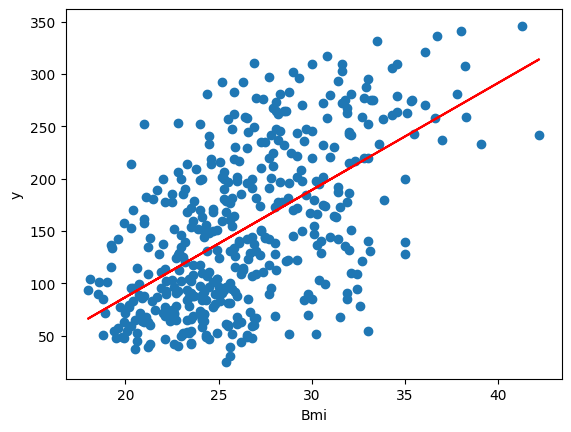

Feature: Bp
Slope: 2.461
Y-Intercept: -80.768
MSE: 4774.114
r2 score: 0.195


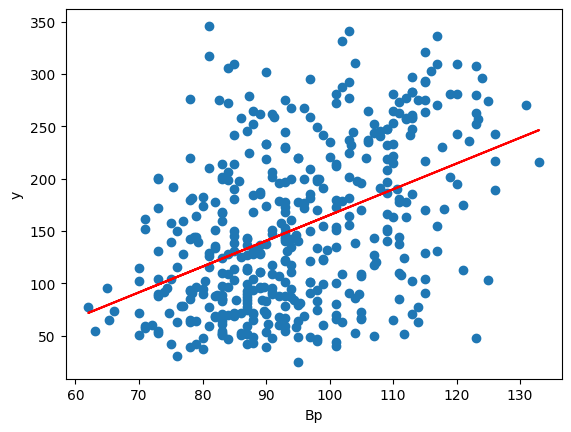

Feature: S1
Slope: 0.472
Y-Intercept: 62.802
MSE: 5663.316
r2 score: 0.045


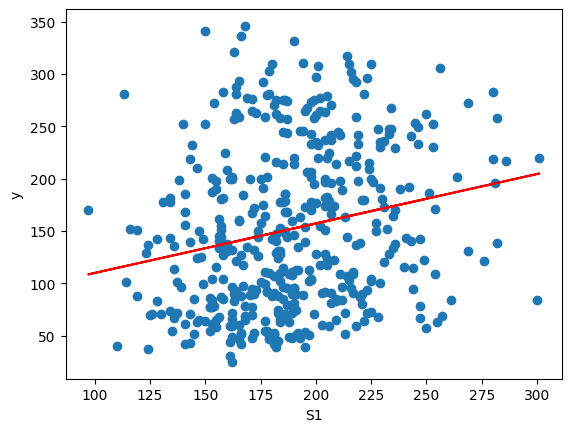

Feature: S2
Slope: 0.441
Y-Intercept: 101.201
MSE: 5750.241
r2 score: 0.030


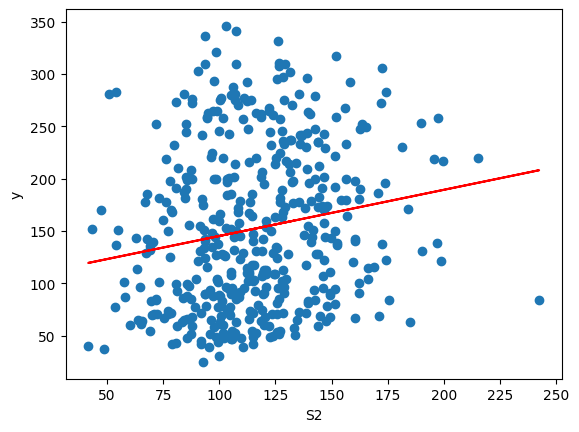

Feature: S3
Slope: -2.353
Y-Intercept: 269.291
MSE: 5005.662
r2 score: 0.156


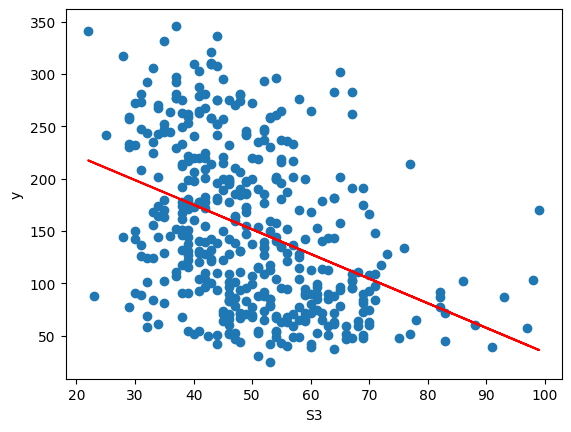

Feature: S4
Slope: 25.716
Y-Intercept: 47.464
MSE: 4831.138
r2 score: 0.185


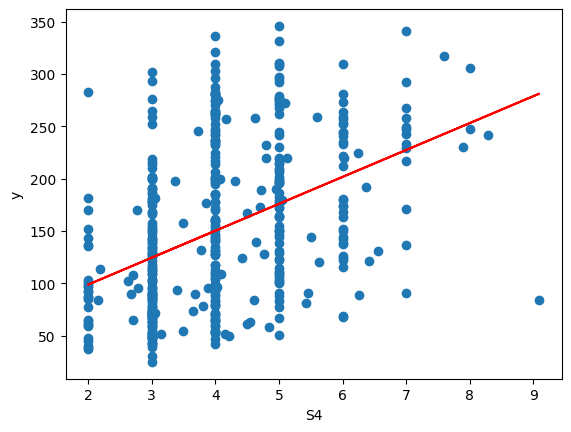

Feature: S5
Slope: 83.511
Y-Intercept: -235.477
MSE: 4030.999
r2 score: 0.320


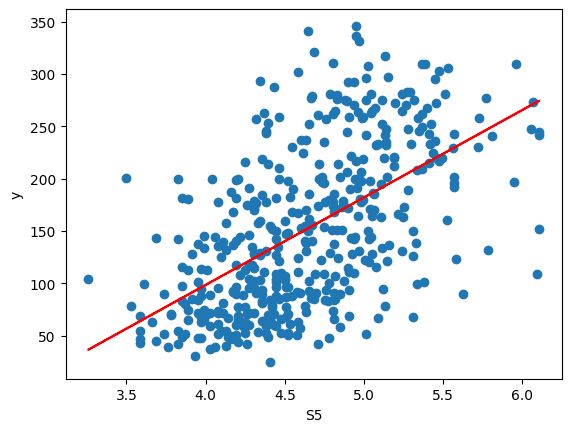

Feature: S6
Slope: 2.565
Y-Intercept: -81.939
MSE: 5062.381
r2 score: 0.146


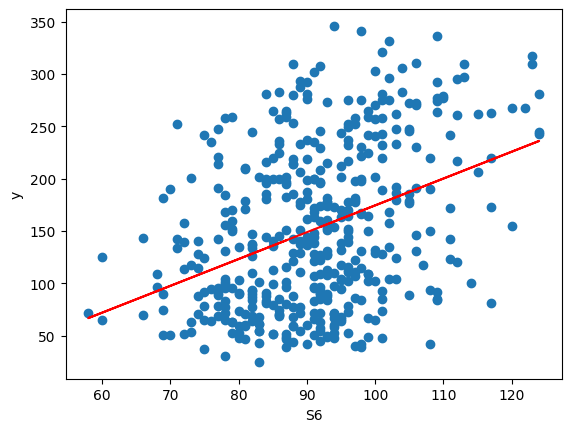


Best feature: Bmi
Best MSE: 3890.457


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(df)
#'X' is one of the independent variables and 'y' is the dependent variable
X = df[['Age', 'Sex', 'Bmi', 'Bp', 'S1' ,'S2', 'S3', 'S4', 'S5', 'S6']]
y = df['Regression']

# Initialize variables to keep track of the best feature and the best MSE so far
best_feature = None
best_mse = float('inf')

# Iterate over each feature in X
for feature_name in X.columns:
    # Reshape the feature array to have a single column
    X_feature = X[feature_name].values.reshape(-1, 1)
    
    # Initialize a linear regression model and fit it to the data
    reg = LinearRegression().fit(X_feature, y)
    
    # Calculate the predicted values and the MSE
    y_pred = reg.predict(X_feature)
    mse = mean_squared_error(y, y_pred)
    r2score = r2_score(y,y_pred)
    
    # If this feature has a lower MSE than the previous best feature, update the best feature
    if mse < best_mse:
        best_feature = feature_name
        best_mse = mse
        
    # Print the model's coefficients, MSE, and plot the regression line for this feature
    print(f"Feature: {feature_name}")
    print(f"Slope: {reg.coef_[0]:.3f}")
    print(f"Y-Intercept: {reg.intercept_:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"r2 score: {r2score:.3f}")
    plt.scatter(X_feature, y)
    plt.plot(X_feature, y_pred, color='red')
    plt.xlabel(feature_name)
    plt.ylabel('y')
    plt.show()
    
# Print the best feature and its corresponding MSE
print(f"\nBest feature: {best_feature}")
print(f"Best MSE: {best_mse:.3f}")

#2 Predicting 'y' using a pair feature of 'x' 

Features: Age, Sex
Slope 1: 1.094
Slope 2: 1.658
Y-Intercept: 96.621
MSE: 5719.883
r2 score: 0.035


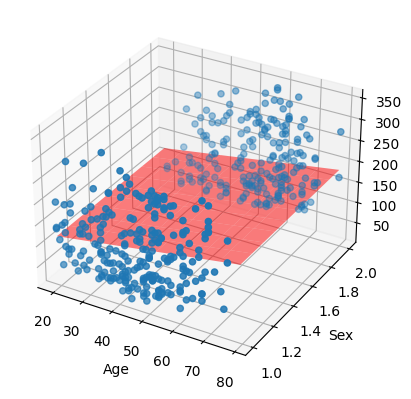

Features: Age, Bmi
Slope 1: 0.483
Slope 2: 9.968
Y-Intercept: -134.218
MSE: 3851.799
r2 score: 0.350


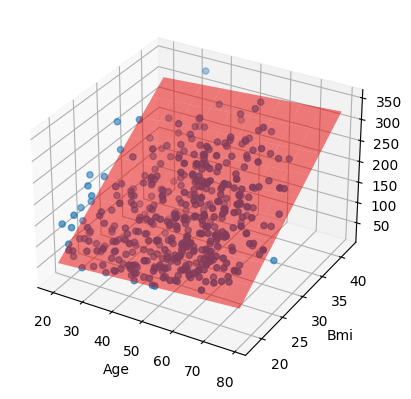

Features: Age, Bp
Slope 1: 0.264
Slope 2: 2.377
Y-Intercept: -85.629
MSE: 4763.528
r2 score: 0.197


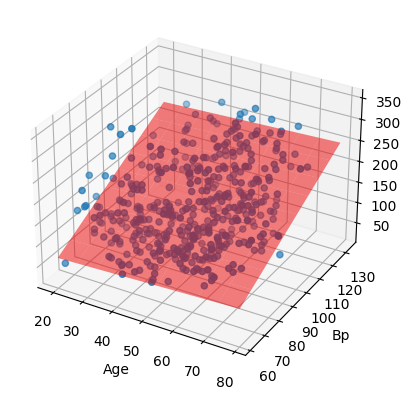

Features: Age, S1
Slope 1: 0.837
Slope 2: 0.390
Y-Intercept: 37.778
MSE: 5551.236
r2 score: 0.064


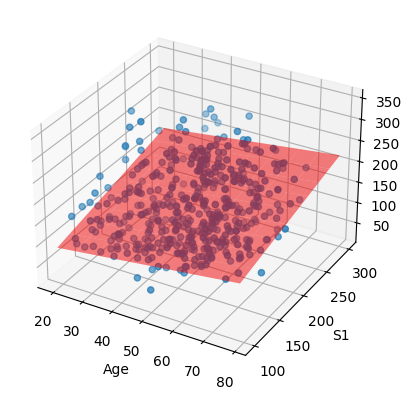

Features: Age, S2
Slope 1: 0.925
Slope 2: 0.354
Y-Intercept: 66.413
MSE: 5610.588
r2 score: 0.054


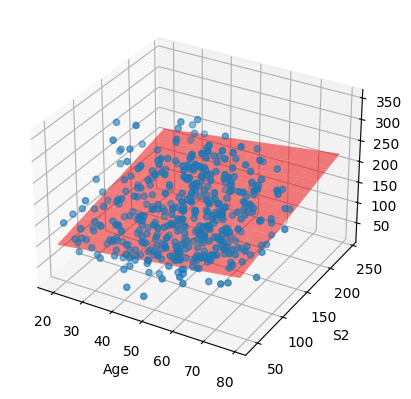

Features: Age, S3
Slope 1: 0.936
Slope 2: -2.282
Y-Intercept: 220.343
MSE: 4856.394
r2 score: 0.181


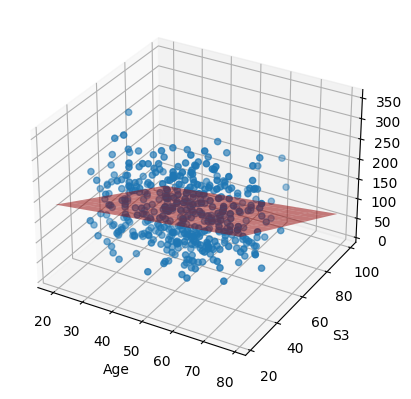

Features: Age, S4
Slope 1: 0.614
Slope 2: 24.443
Y-Intercept: 22.830
MSE: 4769.089
r2 score: 0.196


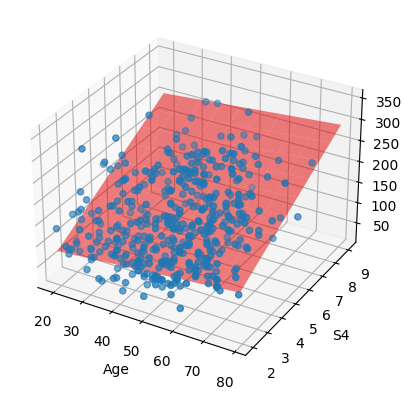

Features: Age, S5
Slope 1: 0.220
Slope 2: 82.017
Y-Intercept: -239.213
MSE: 4023.310
r2 score: 0.322


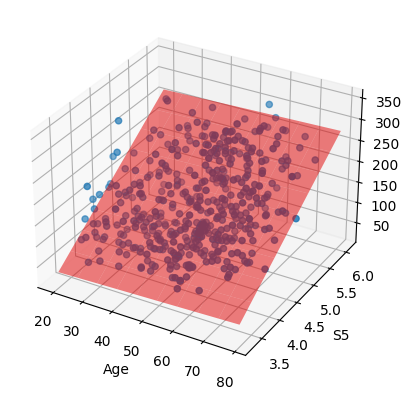

Features: Age, S6
Slope 1: 0.469
Slope 2: 2.404
Y-Intercept: -89.967
MSE: 5028.107
r2 score: 0.152


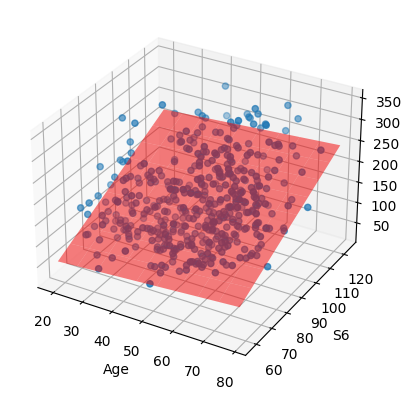

Features: Sex, Bmi
Slope 1: -1.344
Slope 2: 10.247
Y-Intercept: -116.154
MSE: 3890.010
r2 score: 0.344


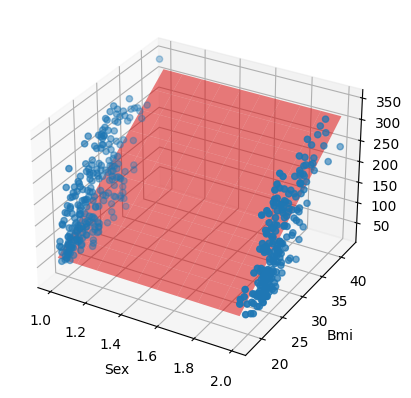

Features: Sex, Bp
Slope 1: -10.377
Slope 2: 2.551
Y-Intercept: -74.080
MSE: 4748.857
r2 score: 0.199


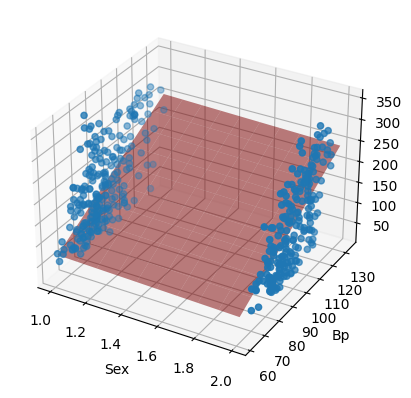

Features: Sex, S1
Slope 1: 5.498
Slope 2: 0.470
Y-Intercept: 55.259
MSE: 5655.798
r2 score: 0.046


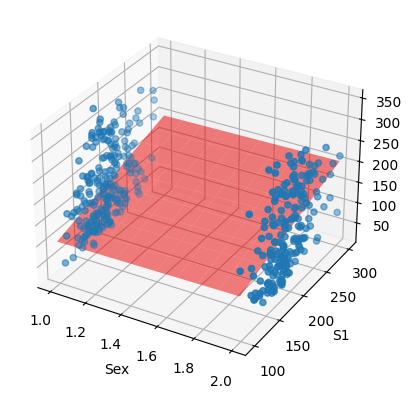

Features: Sex, S2
Slope 1: 2.873
Slope 2: 0.434
Y-Intercept: 97.761
MSE: 5748.228
r2 score: 0.031


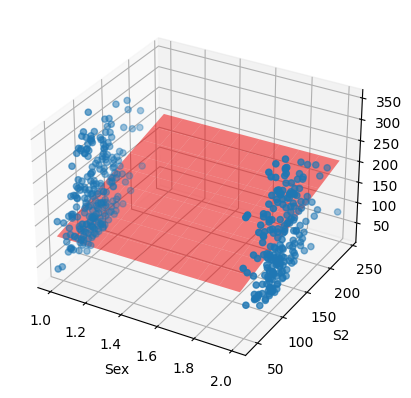

Features: Sex, S3
Slope 1: -19.211
Slope 2: -2.634
Y-Intercept: 311.504
MSE: 4926.970
r2 score: 0.169


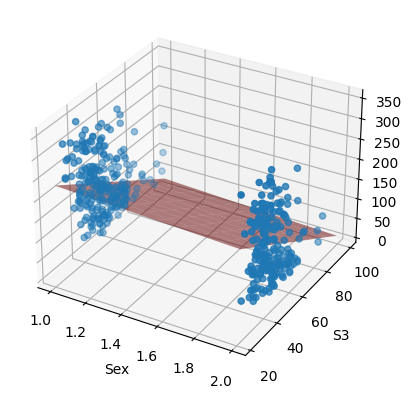

Features: Sex, S4
Slope 1: -17.328
Slope 2: 27.944
Y-Intercept: 63.839
MSE: 4764.624
r2 score: 0.197


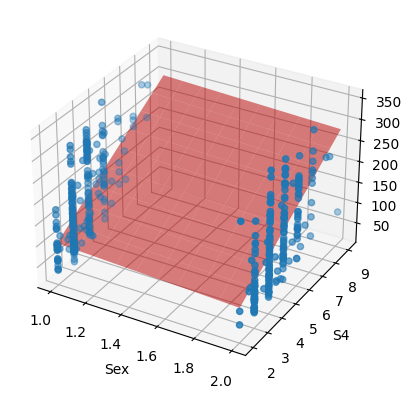

Features: Sex, S5
Slope 1: -6.595
Slope 2: 84.457
Y-Intercept: -230.182
MSE: 4020.413
r2 score: 0.322


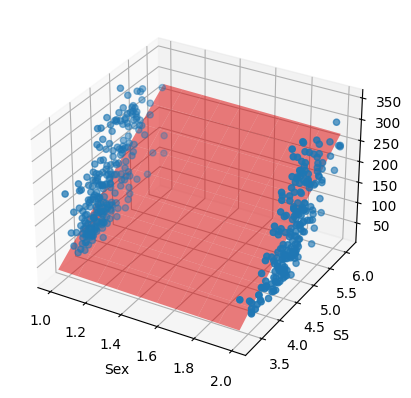

Features: Sex, S6
Slope 1: -5.895
Slope 2: 2.618
Y-Intercept: -78.148
MSE: 5054.102
r2 score: 0.148


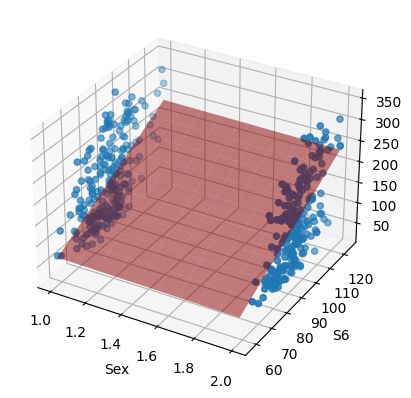

Features: Bmi, Bp
Slope 1: 8.519
Slope 2: 1.385
Y-Intercept: -203.623
MSE: 3581.685
r2 score: 0.396


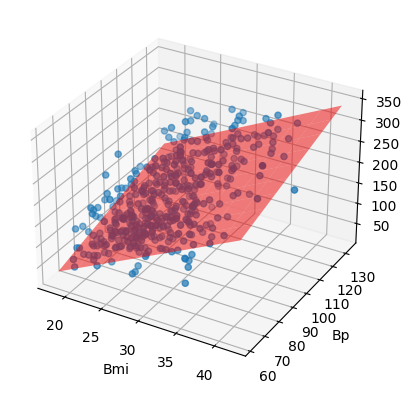

Features: Bmi, S1
Slope 1: 9.928
Slope 2: 0.156
Y-Intercept: -139.189
MSE: 3863.290
r2 score: 0.349


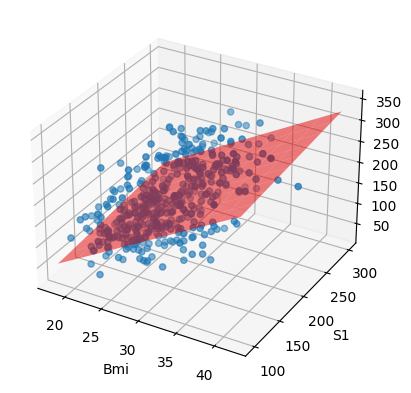

Features: Bmi, S2
Slope 1: 10.131
Slope 2: 0.057
Y-Intercept: -121.639
MSE: 3887.679
r2 score: 0.344


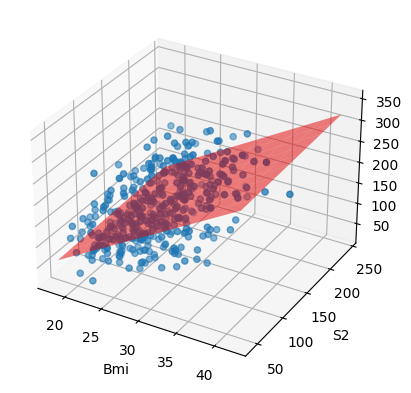

Features: Bmi, S3
Slope 1: 8.904
Slope 2: -1.237
Y-Intercept: -21.116
MSE: 3669.264
r2 score: 0.381


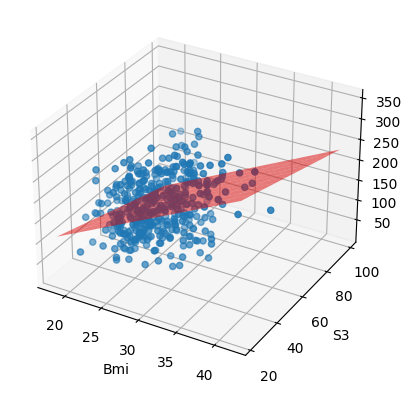

Features: Bmi, S4
Slope 1: 8.597
Slope 2: 13.536
Y-Intercept: -129.716
MSE: 3638.169
r2 score: 0.386


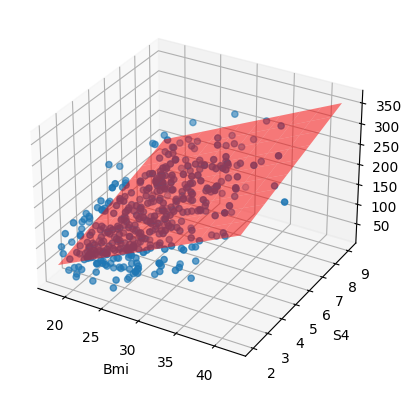

Features: Bmi, S5
Slope 1: 7.276
Slope 2: 56.056
Y-Intercept: -299.958
MSE: 3205.190
r2 score: 0.459


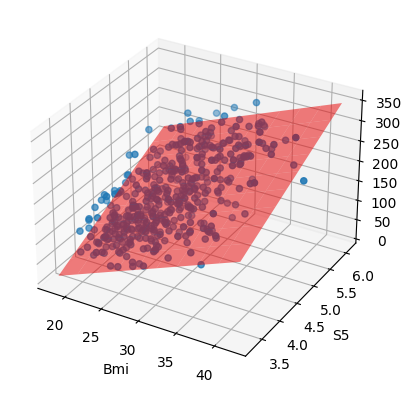

Features: Bmi, S6
Slope 1: 8.998
Slope 2: 1.221
Y-Intercept: -196.615
MSE: 3723.629
r2 score: 0.372


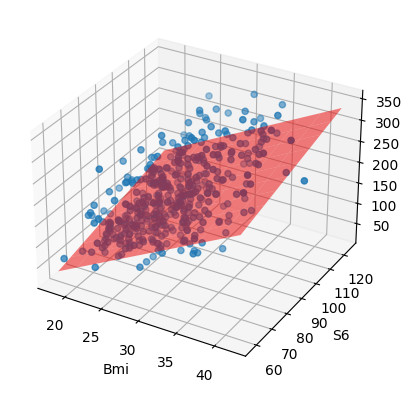

Features: Bp, S1
Slope 1: 2.310
Slope 2: 0.248
Y-Intercept: -113.495
MSE: 4704.681
r2 score: 0.207


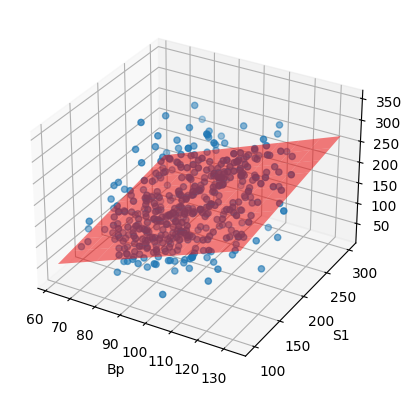

Features: Bp, S2
Slope 1: 2.362
Slope 2: 0.242
Y-Intercept: -99.350
MSE: 4721.978
r2 score: 0.204


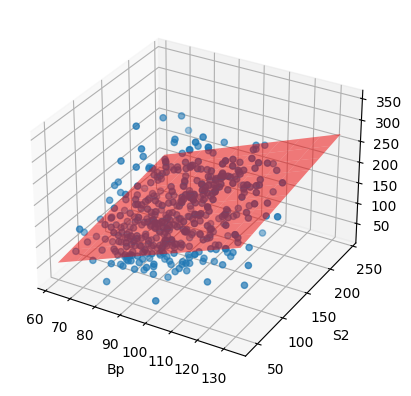

Features: Bp, S3
Slope 1: 2.136
Slope 2: -1.945
Y-Intercept: 46.835
MSE: 4162.939
r2 score: 0.298


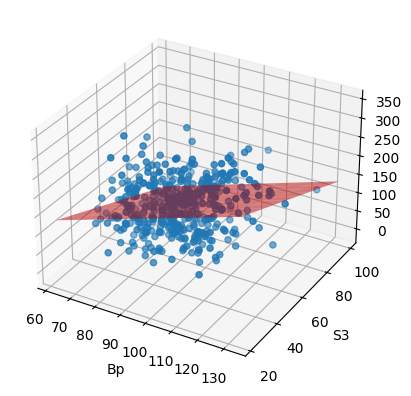

Features: Bp, S4
Slope 1: 1.974
Slope 2: 20.266
Y-Intercept: -117.146
MSE: 4137.043
r2 score: 0.302


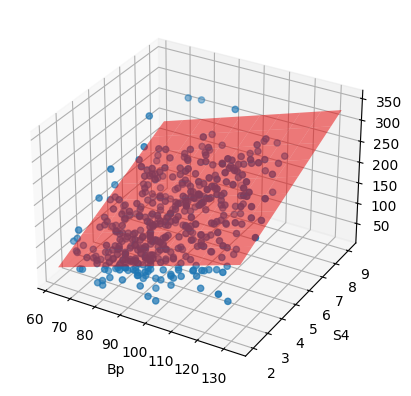

Features: Bp, S5
Slope 1: 1.443
Slope 2: 68.477
Y-Intercept: -302.281
MSE: 3695.054
r2 score: 0.377


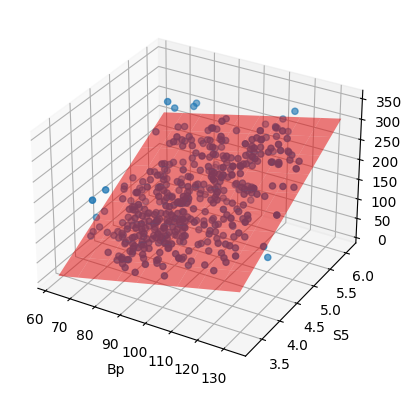

Features: Bp, S6
Slope 1: 1.921
Slope 2: 1.662
Y-Intercept: -181.420
MSE: 4465.233
r2 score: 0.247


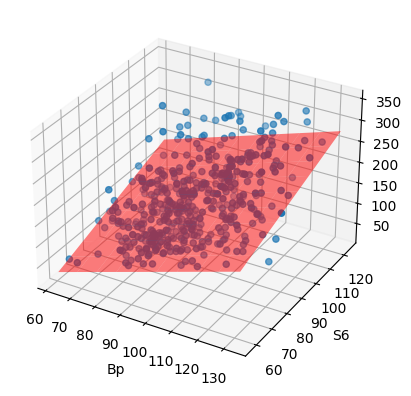

Features: S1, S2
Slope 1: 0.636
Slope 2: -0.208
Y-Intercept: 55.824
MSE: 5655.513
r2 score: 0.046


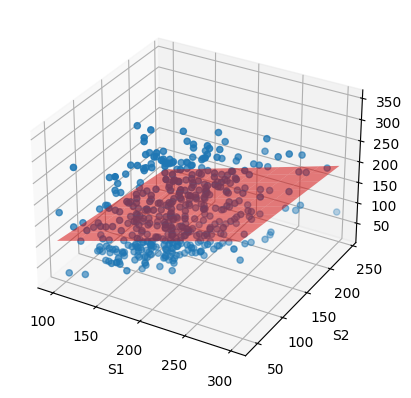

Features: S1, S3
Slope 1: 0.519
Slope 2: -2.425
Y-Intercept: 174.691
MSE: 4684.643
r2 score: 0.210


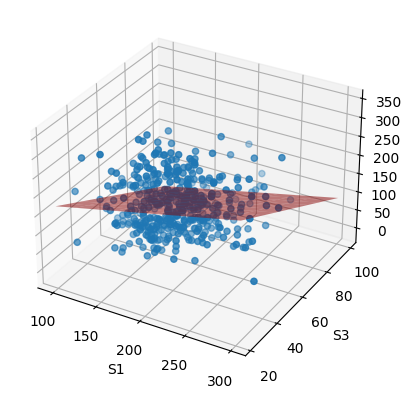

Features: S1, S4
Slope 1: -0.067
Slope 2: 26.696
Y-Intercept: 56.227
MSE: 4827.302
r2 score: 0.186


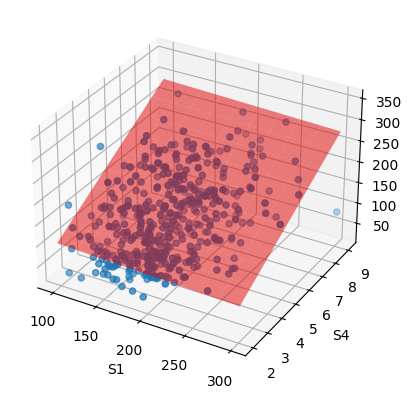

Features: S1, S5
Slope 1: -0.242
Slope 2: 91.768
Y-Intercept: -228.073
MSE: 3979.710
r2 score: 0.329


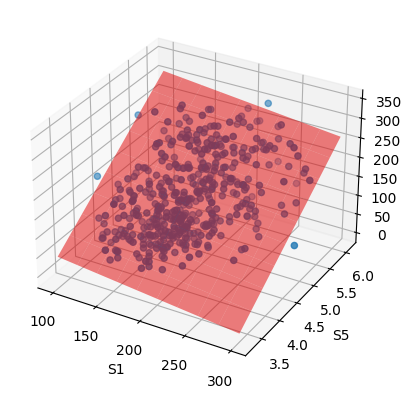

Features: S1, S6
Slope 1: 0.218
Slope 2: 2.351
Y-Intercept: -103.654
MSE: 5011.660
r2 score: 0.155


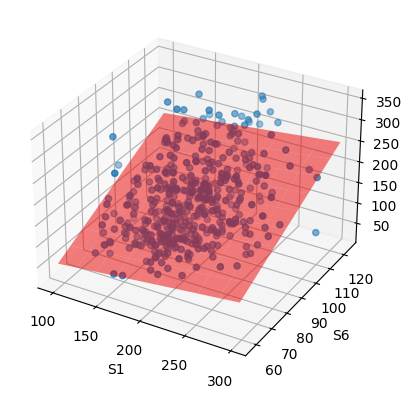

Features: S2, S3
Slope 1: 0.254
Slope 2: -2.236
Y-Intercept: 234.069
MSE: 4948.230
r2 score: 0.166


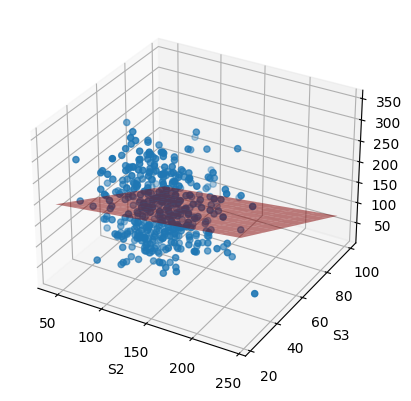

Features: S2, S4
Slope 1: -0.494
Slope 2: 33.393
Y-Intercept: 73.207
MSE: 4704.141
r2 score: 0.207


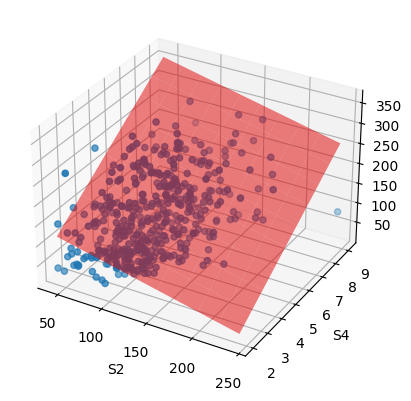

Features: S2, S5
Slope 1: -0.017
Slope 2: 83.830
Y-Intercept: -234.971
MSE: 4030.753
r2 score: 0.320


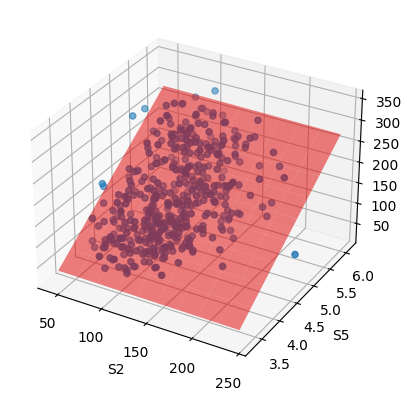

Features: S2, S6
Slope 1: 0.174
Slope 2: 2.431
Y-Intercept: -89.825
MSE: 5036.752
r2 score: 0.151


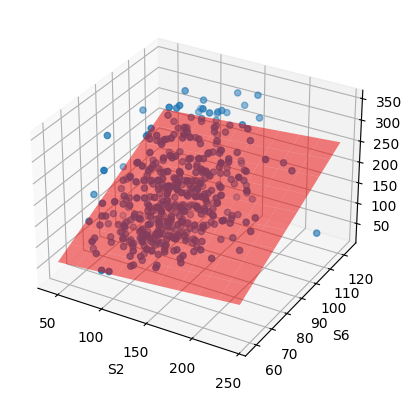

Features: S3, S4
Slope 1: -1.008
Slope 2: 18.253
Y-Intercept: 128.038
MSE: 4753.999
r2 score: 0.198


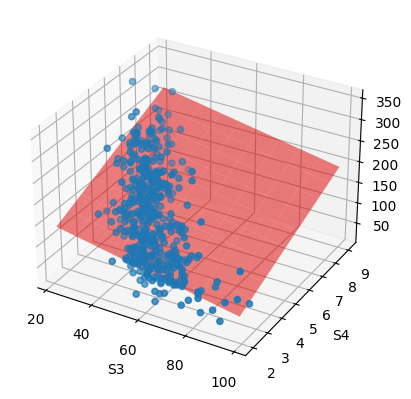

Features: S3, S5
Slope 1: -1.199
Slope 2: 71.676
Y-Intercept: -120.836
MSE: 3829.073
r2 score: 0.354


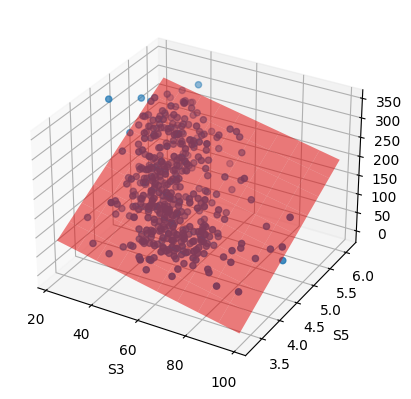

Features: S3, S6
Slope 1: -1.869
Slope 2: 1.989
Y-Intercept: 63.650
MSE: 4522.905
r2 score: 0.237


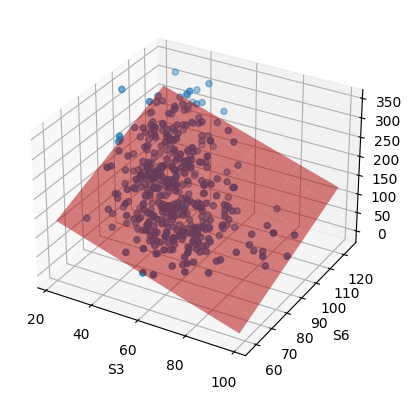

Features: S4, S5
Slope 1: 7.809
Slope 2: 71.592
Y-Intercept: -211.941
MSE: 3968.353
r2 score: 0.331


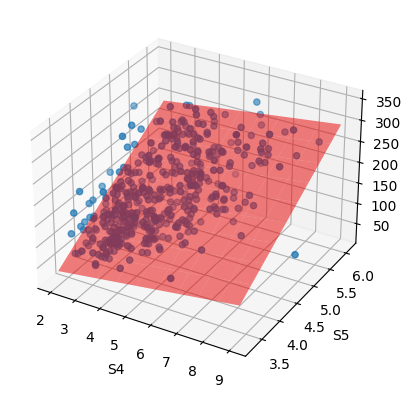

Features: S4, S6
Slope 1: 19.593
Slope 2: 1.647
Y-Intercept: -77.949
MSE: 4535.585
r2 score: 0.235


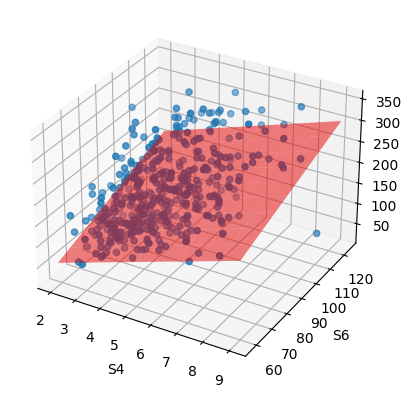

Features: S5, S6
Slope 1: 73.057
Slope 2: 1.022
Y-Intercept: -280.252
MSE: 3922.936
r2 score: 0.338


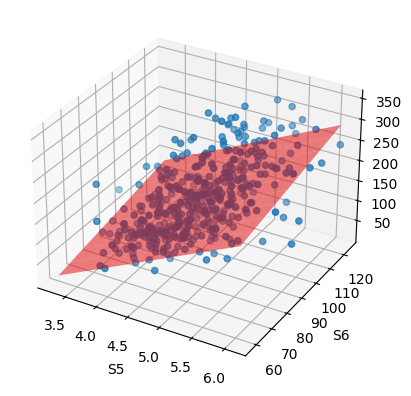


Best features: ('Bmi', 'S5')
Best MSE: 3205.190


In [ ]:
# Define the input (X) and output (y) variables
X = df[['Age', 'Sex', 'Bmi', 'Bp', 'S1' ,'S2', 'S3', 'S4', 'S5', 'S6']]
y = df['Regression']

# Initialize variables to keep track of the best pair of features and the best MSE so far
best_features = None
best_mse = float('inf')

# Iterate over each pair of features in X
for i, feature_name1 in enumerate(X.columns):
    for feature_name2 in X.columns[i+1:]:
        # Reshape the feature arrays to have two columns
        X_features = X[[feature_name1, feature_name2]]
        
        # Initialize a linear regression model and fit it to the data
        reg = LinearRegression().fit(X_features, y)
        
        # Calculate the predicted values and the MSE
        y_pred = reg.predict(X_features)
        mse = mean_squared_error(y, y_pred)
        r2score = r2_score(y,y_pred)
        
        # If this pair of features has a lower MSE than the previous best pair, update the best pair
        if mse < best_mse:
            best_features = (feature_name1, feature_name2)
            best_mse = mse
            
        # Print the model's coefficients, MSE, and plot the regression plane for this pair of features
        print(f"Features: {feature_name1}, {feature_name2}")
        print(f"Slope 1: {reg.coef_[0]:.3f}")
        print(f"Slope 2: {reg.coef_[1]:.3f}")
        print(f"Y-Intercept: {reg.intercept_:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"r2 score: {r2score:.3f}")
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_features.iloc[:,0], X_features.iloc[:,1], y)
        x1_grid, x2_grid = np.meshgrid(np.linspace(X_features.iloc[:,0].min(), X_features.iloc[:,0].max(), 10), 
                                       np.linspace(X_features.iloc[:,1].min(), X_features.iloc[:,1].max(), 10))
        y_grid = reg.intercept_ + reg.coef_[0]*x1_grid + reg.coef_[1]*x2_grid
        ax.plot_surface(x1_grid, x2_grid, y_grid, color='r', alpha=0.5)
        ax.set_xlabel(feature_name1)
        ax.set_ylabel(feature_name2)
        ax.set_zlabel('y')
        plt.show()
        
# Print the best pair of features and its corresponding MSE
print(f"\nBest features: {best_features}")
print(f"Best MSE: {best_mse:.3f}")

We can conclude that using both 'bmi' and 's5' as features gave a better prediction performance than using only 'bmi'.

# 3 Predicting 'y' using all features of 'x'


In [ ]:
# split the data into features (X) and target (y)
X = df.drop('Regression', axis=1).values
y = df['Regression'].values

# train the linear regression model
reg = LinearRegression().fit(X, y)

# get the coefficients (slope and intercept) of the linear regression model
coefficients = {'Feature': df.columns[:-1], 'Coefficient': reg.coef_}
coefficients_df = pd.DataFrame(coefficients)
print(coefficients_df)

# calculate the mean squared error of the model
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print('MSE: ', mse)


  Feature  Coefficient
0     Age    -0.036361
1     Sex   -22.859648
2     Bmi     5.602962
3      Bp     1.116808
4      S1    -1.089996
5      S2     0.746450
6      S3     0.372005
7      S4     6.533832
8      S5    68.483125
9      S6     0.280117
MSE:  2859.6963475867506


it appears that the 'bmi' feature has the highest positive coefficient, indicating that it is the feature that most strongly predicts the target variable 'y' in the diabetes dataset. The 's1' feature has the highest negative coefficient, indicating that it is the feature that is most strongly negatively correlated with 'y'.

The MSE value of 2859.69634758675 suggests that the model's predictions are, on average, about 53.5 units away from the actual values.

#4 Compute MSE and validation MSE fitting regrosser in all features 

In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n_train in [20, 50, 100, 200]:
    X_train_subset = X_train[:n_train]
    y_train_subset = y_train[:n_train]

    model = LinearRegression()
    model.fit(X_train_subset, y_train_subset)

    train_pred = model.predict(X_train_subset)
    valid_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train_subset, train_pred)
    valid_mse = mean_squared_error(y_test, valid_pred)

    print(f"Training set size: {n_train}")
    print(f"Training MSE: {train_mse}")
    print(f"Validation MSE: {valid_mse}")
    print("="*50)


Training set size: 20
Training MSE: 681.5929101831888
Validation MSE: 8591.833056135092
Training set size: 50
Training MSE: 1915.8331734617893
Validation MSE: 3345.89448201044
Training set size: 100
Training MSE: 2336.3808518719416
Validation MSE: 3219.6807543265704
Training set size: 200
Training MSE: 2688.5578351689865
Validation MSE: 3036.6896040659985


we can see that the training MSE increases as the training set size increases. This is because the model is fitting to more data and becoming more complex.

On the other hand, the validation MSE decreases as the training set size increases until a certain point (n_train=100), after which it stabilizes. This suggests that the model is able to generalize well to new data until a certain point, after which adding more data does not improve the model's performance.

#Extra Credit 

In [ ]:
import xgboost as xgb
X = df.drop('Regression', axis =1) 
y = df['Regression']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(Xtrain, ytrain)
xgb_y_pred = xgb_model.predict(Xtest)
xgb_mse = mean_squared_error(ytest, xgb_y_pred)


print(f"XGBoost Model Mean Squared Error: {xgb_mse}")


XGBoost Model Mean Squared Error: 4082.5554865050663
